In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#let's read and comprehend the information

#let's use pandas to read the data file.

leads_data = pd.read_csv("leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# Let's check the shape of the dataset
leads_data.shape

(9240, 37)

In [4]:
# Let's check statistics for numerical columns
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
# Let's check whether there are any duplicates
leads_data.duplicated().sum()

0

In [6]:
#Let's examine each column, its datatype, and the presence of any null values.

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Data Cleaning

# Let's change nomenclature to snakecase
leads_data.columns = leads_data.columns.str.replace(' ', '_').str.lower()
leads_data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
# Let's shorten column names
leads_data.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

leads_data.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


In [9]:
#Drop prospect_id column

leads_data.drop('prospect_id', axis = 1, inplace = True)

In [10]:
#Replace "Select" category with null values

# Let's Select all non-numeric columns
leads_data_obj = leads_data.select_dtypes(include='object')

# Let's Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = leads_data_obj.columns[leads_data_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


In [11]:
#  There are 4 columns that contains Select, which are effectively null values. We are going to make that change

In [12]:
# Let's select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# Let's replace values
leads_data[sel_cols] = leads_data[sel_cols].replace('Select', np.NaN)

In [13]:
#Manage columns with sales generated and null values.


# Considering that several columns have a high percentage of null values, let's figure out what proportion of
# null values there are in each column before making a choice.


# Additionally, since the Sales produced columns contain data inputs made after the sales team has communicated 
# with the student, we can remove these as well. These data are irrelevant to our model's goal of generating a lead score.

#The columns are "tags","lead_quality","all asymmetrique columns","last_activity" and"last_notable_activity"


In [14]:
# Let's Calculate percentage of null values for each column
(leads_data.isnull().sum() / leads_data.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

In [15]:
#### Drop columns that have greater null values  or Sales generated columns or activity related

In [16]:
leads_data.drop(['source', 'lead_quality', 'last_activity', 'last_notable_activity','lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score','tags'], 
        axis = 1, inplace = True)

leads_data.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [17]:
# Lets look at what are we left with
# Let's Calculate percentage of null values for each column
(leads_data.isnull().sum() / leads_data.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [18]:
# There are five columns that still have high null values: country, specialization, occupation, course_selection_reason 
# and city. We will look at them individually to see what can be done

In [19]:
#country column

leads_data.country.value_counts(normalize = True, dropna = False) * 100

country
India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switze

In [20]:
#Observation 
# The distribution of the data is very heavily skewed, with India + null values = 97% of the total. 
# It is safe to drop this column.

In [21]:
leads_data.drop('country', axis = 1, inplace = True)

In [22]:
# course_selection_reason column

leads_data.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

course_selection_reason
Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: proportion, dtype: float64

In [23]:
# Observation
#The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. 
#It is safe to drop this column.

In [24]:
leads_data.drop('course_selection_reason', axis = 1, inplace = True)

In [25]:
# occupation column

leads_data.occupation.value_counts(normalize = True, dropna = False) * 100

occupation
Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: proportion, dtype: float64

In [26]:
# Observation

# For occupation, we can first combine categories, and then impute proportionally to 
# maintain the distribution and not introduce bias

# Let's combine low representing categories
leads_data.loc[(leads_data.occupation == 'Student') | (leads_data.occupation == 'Other') | (leads_data.occupation == 'Housewife') | 
       (leads_data.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [27]:
leads_data.occupation.value_counts(normalize = True) * 100

occupation
Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: proportion, dtype: float64

In [28]:
# Let's impute proportionately
leads_data['occupation'] = leads_data.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 'Student and Others'], p = [0.8550, 0.1078, 0.0372], size = len(leads_data))))

In [29]:
#specialization column

leads_data.specialization.value_counts(normalize = True, dropna = False) * 100

specialization
NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: proportion, dtype: float64

In [30]:
#Observation

# For specialization, we can first combine categories based on the course type, and then impute proportionally to
# maintain the distribution and not introduce bias


# Let's categorize all management courses
leads_data.loc[(leads_data.specialization == 'Finance Management') | (leads_data.specialization == 'Human Resource Management') | 
       (leads_data.specialization == 'Marketing Management') |  (leads_data.specialization == 'Operations Management') |
       (leads_data.specialization == 'IT Projects Management') | (leads_data.specialization == 'Supply Chain Management') |
       (leads_data.specialization == 'Healthcare Management') | (leads_data.specialization == 'Hospitality Management') |
       (leads_data.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# Let's categorize all busines courses
leads_data.loc[(leads_data.specialization == 'Business Administration') | (leads_data.specialization == 'International Business') | 
       (leads_data.specialization == 'Rural and Agribusiness') | (leads_data.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# Let's categorize all industry courses
leads_data.loc[(leads_data.specialization == 'Banking, Investment And Insurance') | (leads_data.specialization == 'Media and Advertising') |
       (leads_data.specialization == 'Travel and Tourism') | (leads_data.specialization == 'Services Excellence') |
       (leads_data.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [31]:
leads_data.specialization.value_counts(normalize = True) * 100

specialization
Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: proportion, dtype: float64

In [32]:
# Let's impute proportionately
leads_data['specialization'] = leads_data.specialization.fillna(pd.Series(np.random.choice(['Management Specializations', 'Business Specializations', 'Industry Specializations'], p = [0.7258, 0.1213, 0.1529 ], size = len(leads_data))))

In [33]:
#city column

leads_data.city.value_counts(normalize = True, dropna = False) * 100

city
NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: proportion, dtype: float64

In [34]:
# Observations 

# We will categorize cities based on logical decisions and impute proportionately

In [35]:
# Let's categorize all non-mumbai, but Maharashtra cities
leads_data.loc[(leads_data.city == 'Thane & Outskirts') | (leads_data.city == 'Other Cities of Maharashtra'), 'city'] = 'Non-Mumbai Maharashtra Cities'

# Let's categorize all other cities
leads_data.loc[(leads_data.city == 'Other Cities') | (leads_data.city == 'Other Metro Cities') | (leads_data.city == 'Tier II Cities') , 'city'] = 'Non-Maharashtra Cities'

In [36]:
leads_data.city.value_counts(normalize = True) * 100

city
Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: proportion, dtype: float64

In [37]:
# Let's impute proportionately
leads_data['city'] = leads_data.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities','Non-Maharashtra Cities'], p = [0.5784, 0.2170, 0.2046 ], size = len(leads_data))))

In [38]:
#Handle categorical columns with low number of missing values and low representation of categories

#In this step, we will go through the rest of the categorical columns one by one and

#     Merge categories that have low representation
#     Impute the missing values


(leads_data.isnull().sum() / leads_data.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [39]:
# Let's determine unique values for all object datatype columns
for k, v in leads_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [40]:
#Observation

# As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
#        lead_origin
#        lead_source



#lead_origin column

leads_data.lead_origin.value_counts(normalize = True, dropna = False) * 100

lead_origin
Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: proportion, dtype: float64

In [41]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
leads_data.loc[(leads_data.lead_origin == 'Lead Import') | (leads_data.lead_origin == 'Quick Add Form') | (leads_data.lead_origin == 'Lead Add Form'), 'lead_origin'] = 'Lead Add Form and Others'

In [42]:
#lead_source column
 
leads_data.lead_source.value_counts(normalize = True, dropna = False) * 100

lead_source
Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: proportion, dtype: float64

In [43]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
leads_data.lead_source.fillna(leads_data.lead_source.mode()[0], inplace=True)

In [44]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
leads_data['lead_source'] = leads_data['lead_source'].apply(lambda x: x if ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') |  (x=='Organic Search') | (x=='Reference'))else 'Other Social Sites')

In [45]:
#Handle Binary columns
#     Drop those columns that have significant data imbalance
#     Drop all those columns that have only 1 unique entry


# Let's determine unique values
for k, v in leads_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [46]:
# Observation

# The following columns can be dropped as they have just 1 unique values
#     magazine
#     course_updates
#     supply_chain_content_updates
#     dm_content_updates
#     cheque_payment


#  Let's now check the data imbalance for the rest of the columns

In [47]:
# Let's select rest of the binary columns in a new dataframe
leads_data_bin = leads_data[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# Let's see value counts for each of the columns
for i in leads_data_bin.columns:
    x = (leads_data_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

do_not_email
No    92.06
Yes    7.94
Name: proportion, dtype: float64

do_not_call
No    99.98
Yes    0.02
Name: proportion, dtype: float64

search
No    99.85
Yes    0.15
Name: proportion, dtype: float64

newspaper_article
No    99.98
Yes    0.02
Name: proportion, dtype: float64

x_education_forums
No    99.99
Yes    0.01
Name: proportion, dtype: float64

newspaper
No    99.99
Yes    0.01
Name: proportion, dtype: float64

digital_advertisement
No    99.96
Yes    0.04
Name: proportion, dtype: float64

through_recommendations
No    99.92
Yes    0.08
Name: proportion, dtype: float64

mastering_interview
No    68.74
Yes   31.26
Name: proportion, dtype: float64



In [48]:
#  Observations
# Because of heavy data imbalance, we can drop the following columns as well

#    do_not_call
#    search
#    newspaper_article
#    x_education_forums
#    newspaper
#    digital_advertisement
#    through_recommendations

In [49]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

leads_data.drop(drop_bin, axis = 1, inplace = True)

In [50]:
# Handle Numerical columns


#  lead_number column: change datatype
#  lead_number column is a unique identifier for each leads_data. Therefore, aggregations won't be of any relevance.
#   We should change it to object

leads_data.lead_number = leads_data.lead_number.astype('object')

In [51]:
# total_visits column
# For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

leads_data.total_visits.fillna(leads_data.total_visits.median(), inplace=True)
leads_data.total_visits = leads_data.total_visits.astype('int')

In [52]:
# page_views_per_visit column¶
# Handle missing values

leads_data.page_views_per_visit.fillna(leads_data.page_views_per_visit.median(), inplace=True)

In [53]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


In [54]:
# Exploratory Data Analysis

# Numerical columns

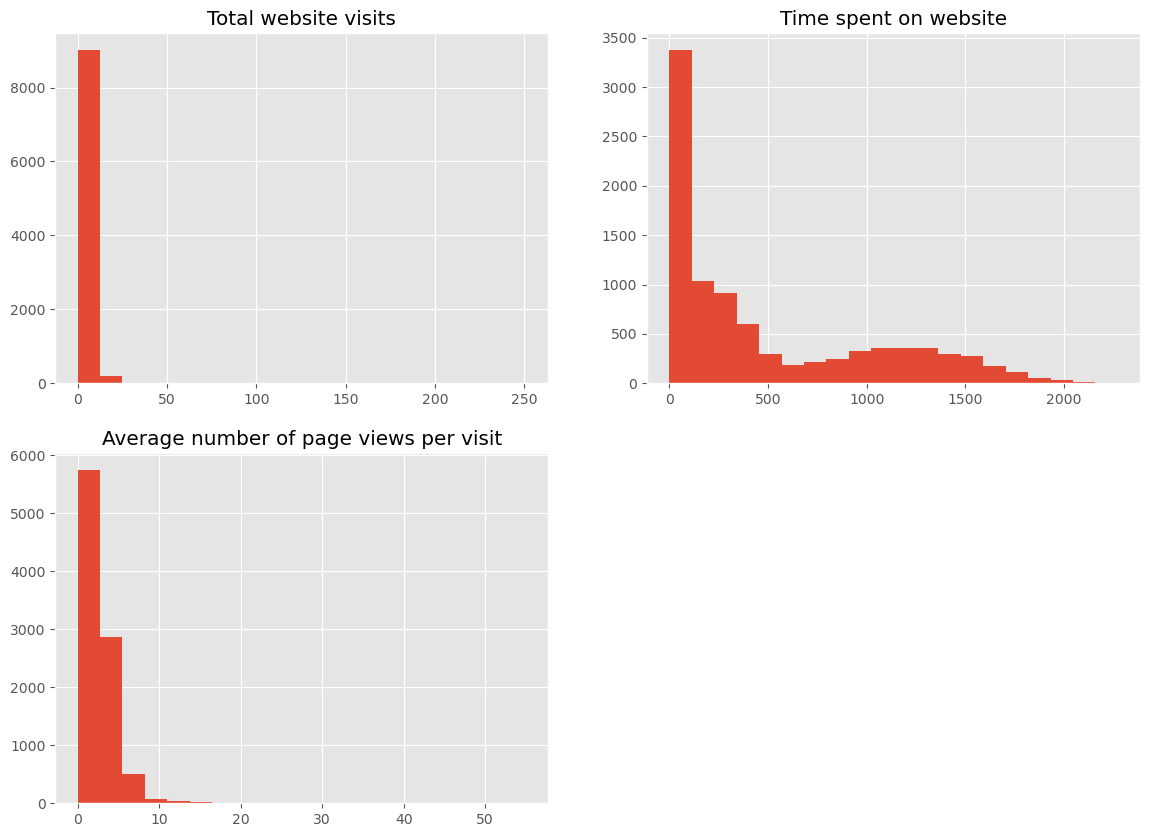

In [55]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(leads_data.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(leads_data.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(leads_data.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

In [56]:
# Observations

# High peaks and skewed data. There might be a possibility of outliers. We will check them next

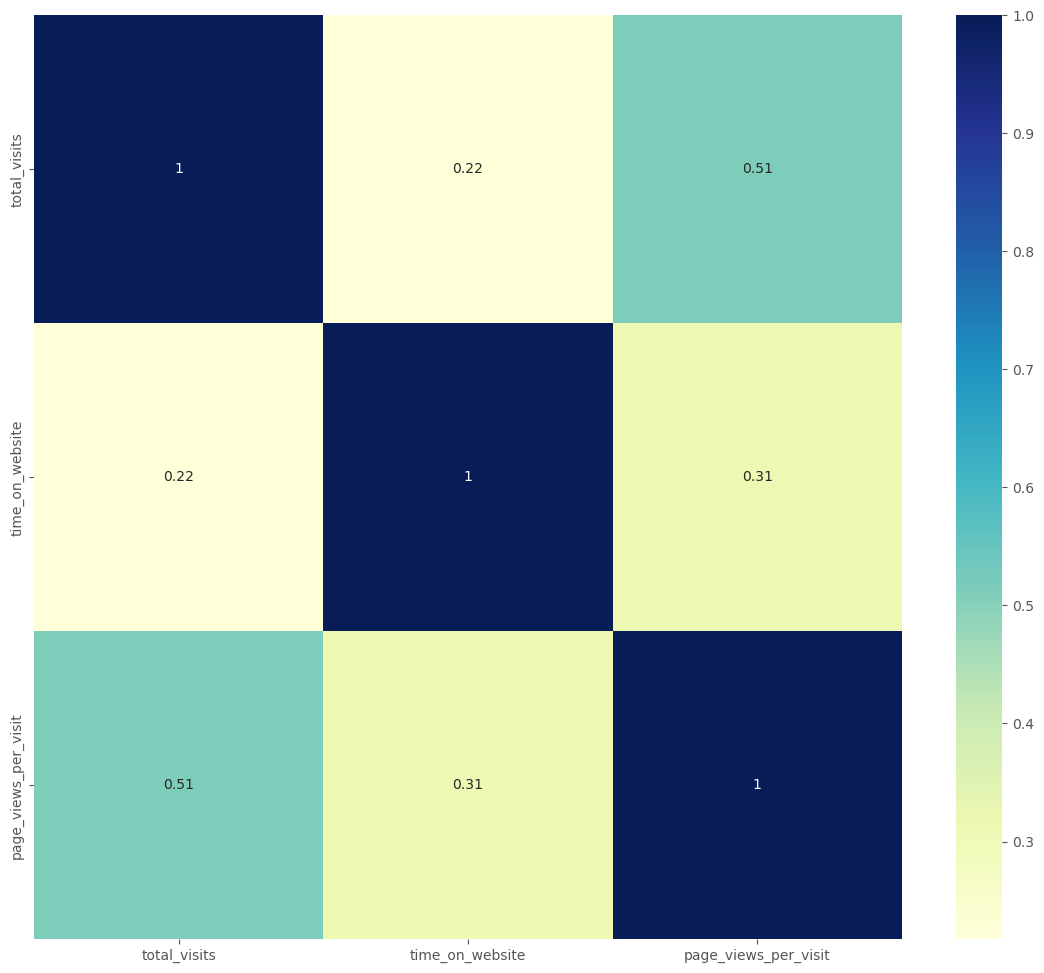

In [57]:
plt.figure(figsize = (14,12))
sns.heatmap(leads_data[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [58]:
#  Observations: No significaqnt correlation such that columns can be dropped

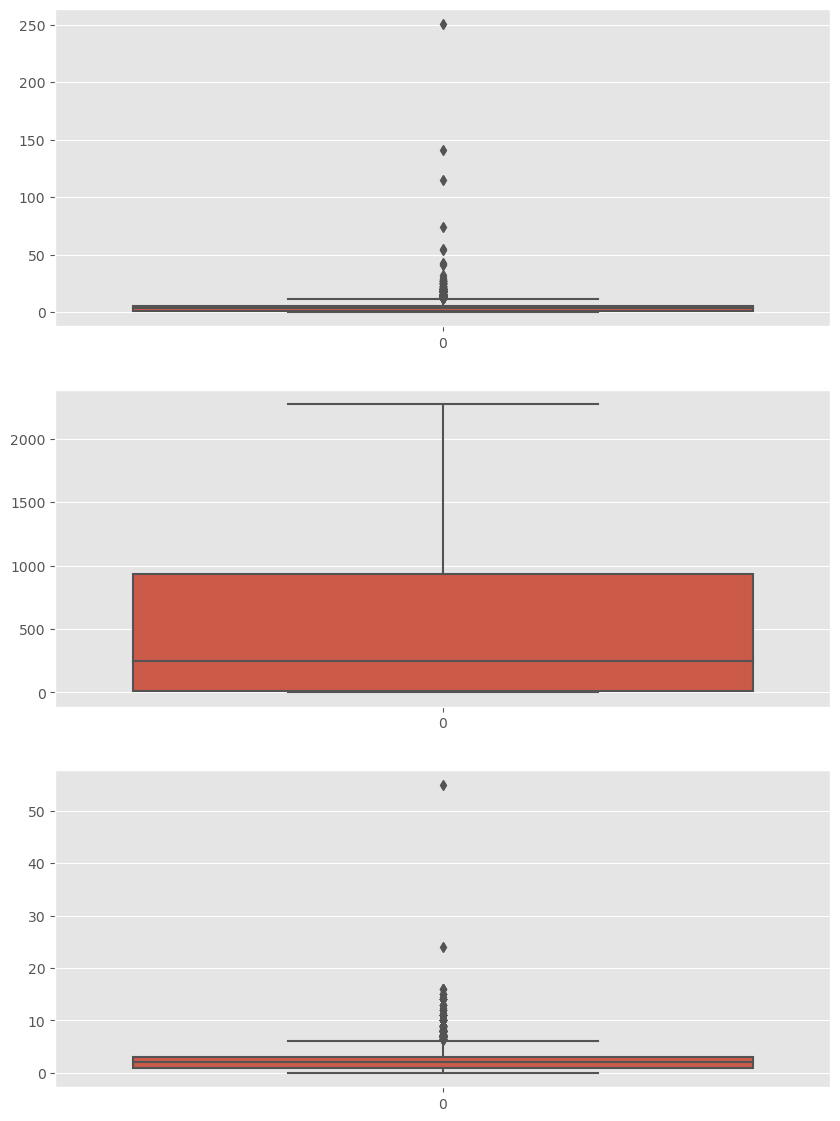

In [59]:
# Let's check for outliers

plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(leads_data.total_visits)

plt.subplot(3,1,2)
sns.boxplot(leads_data.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(leads_data.page_views_per_visit)
plt.show()

In [60]:
#    Observations

#  Looking at both the box plots and the statistics, there are upper bound outliers in both total_visits and
#  page_views_per_visit columns. We can also see that the data can be capped at 99 percentile.

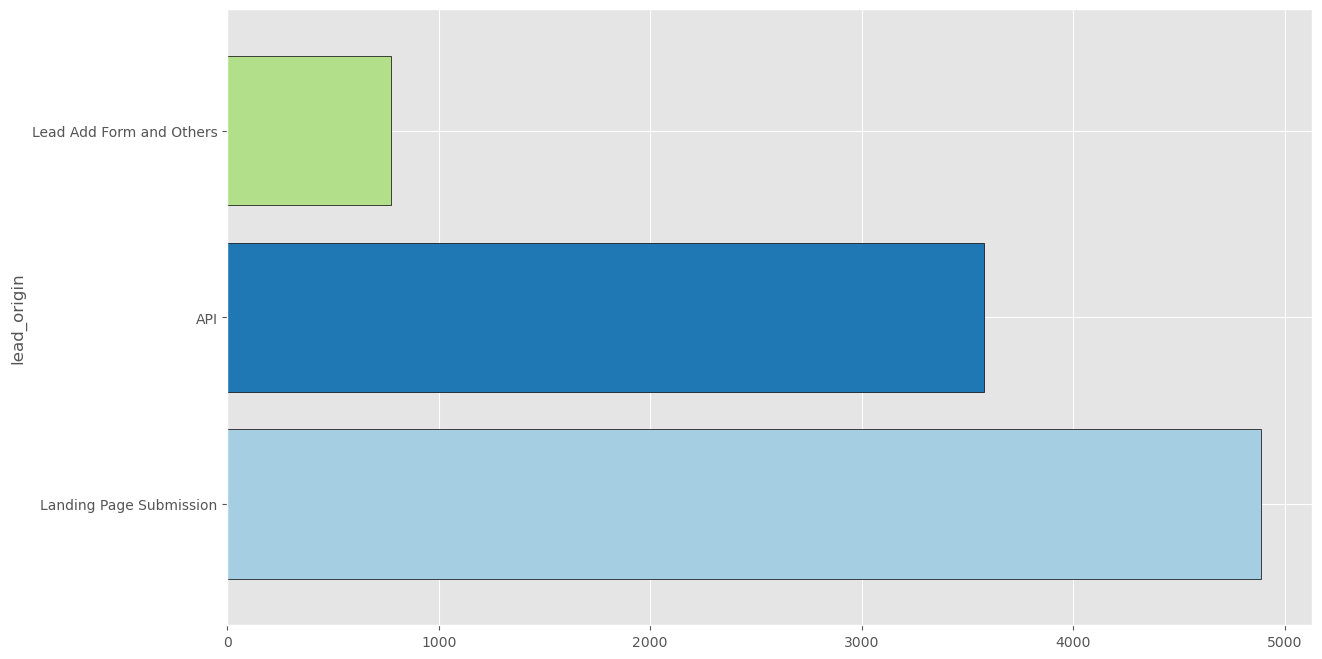

In [61]:
#Categorical columns

#   Lead Origin

plt.figure(figsize = (14, 8))

leads_data.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

In [62]:
leads_data.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Non-Maharashtra Cities,No


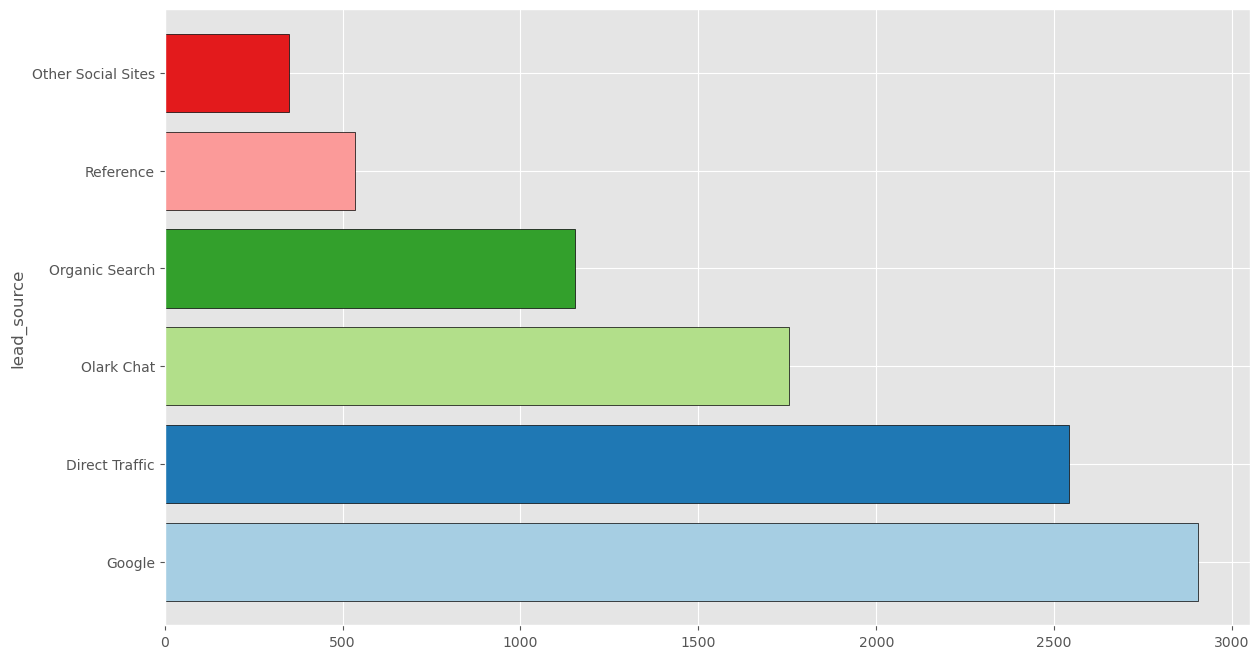

In [63]:
# Lead Source

plt.figure(figsize = (14, 8))

leads_data.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

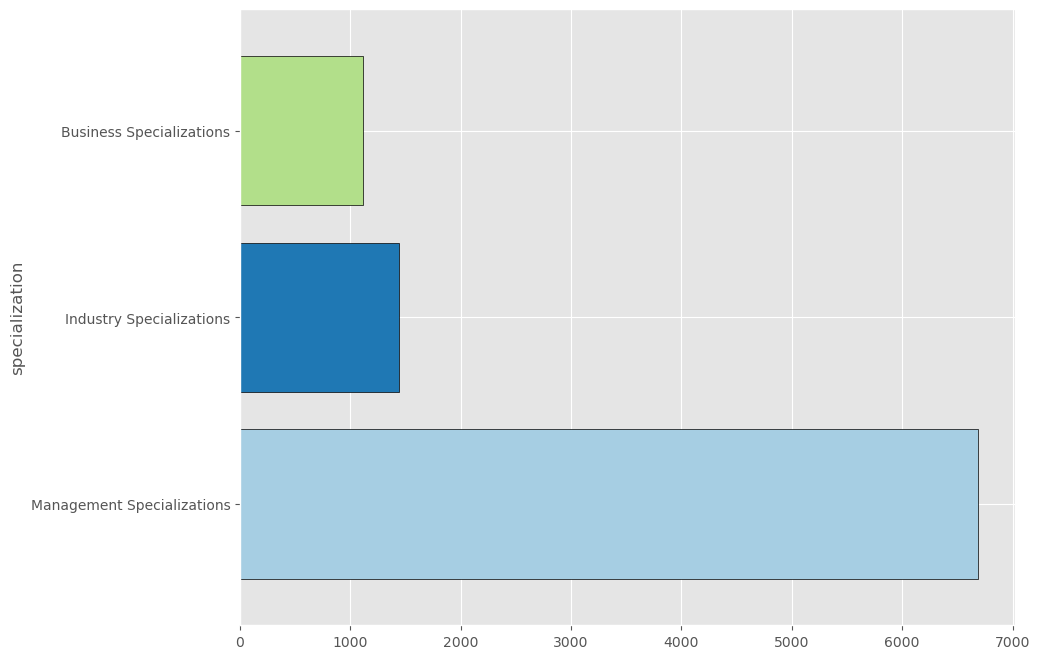

In [64]:
# Specialization

plt.figure(figsize = (10, 8))

leads_data.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

In [65]:
# Most of the speciliazation taken are management

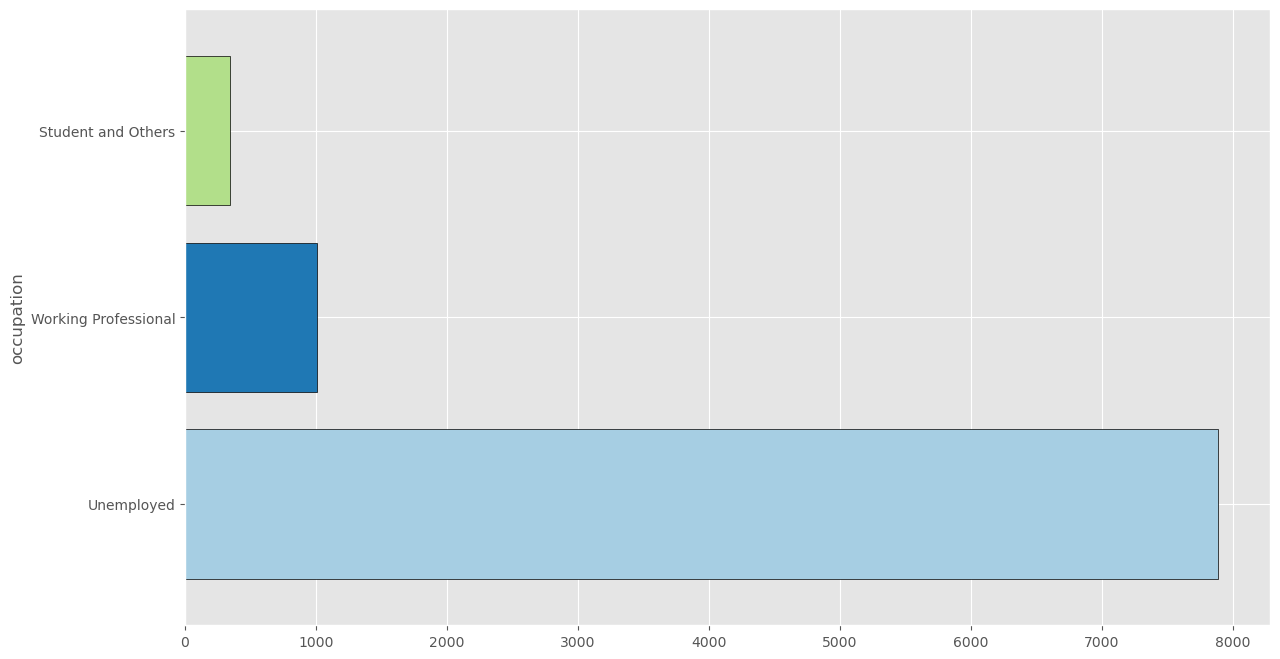

In [66]:
# Occupation

plt.figure(figsize = (14, 8))
leads_data.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8,edgecolor = 'black', color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

In [67]:
# Unempployed users are the most significant leads_data

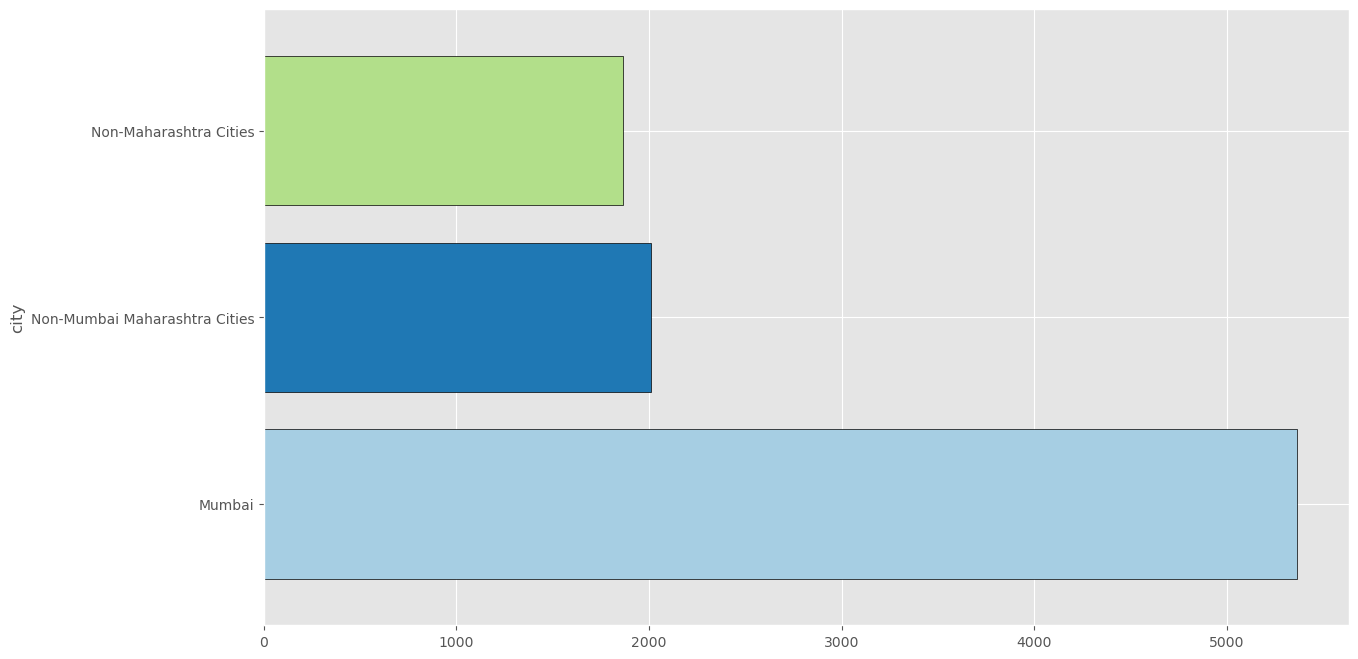

In [68]:
# City

plt.figure(figsize = (14, 8))

leads_data.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

In [69]:
# Mumbai in particular and Maharashtra in general dominates the lead. 
# This is likely due to the fact that the courses are based in Mumbai

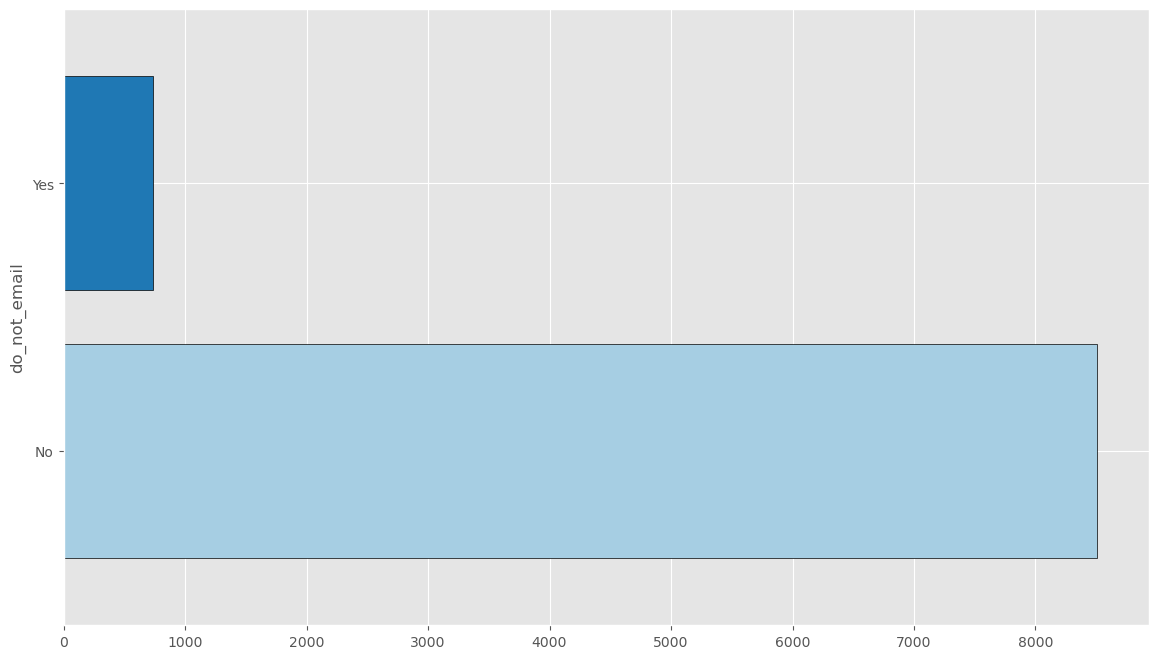

In [70]:
plt.figure(figsize = (14, 8))

leads_data.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads_data))))
plt.show()

In [71]:
#Data Preparation
#    Converting Binary (Yes/No) to 0/1


# Let's determine unique values
for k, v in leads_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [72]:
# We have two binary columns: do_not_email, mastering_interview

In [73]:
binlist = ['do_not_email', 'mastering_interview']

# Let's define the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Let's apply the function to the housing list
leads_data[binlist] = leads_data[binlist].apply(binary_map)

# Let's check the operation was success
leads_data.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Non-Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.50,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


In [74]:
#Creating dummy variable for categorical columns

# Categorical columns are: lead_origin, lead_source, specialization, occupation, city



# Let's create a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Let's add the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [75]:
# Let's drop the columns for which dummies have been created
leads_data.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

leads_data.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,False,False,False,True,False,False,False,False,True,True,False,True,False
1,660728,0,0,5,674,2.50,0,False,False,False,False,True,False,False,False,True,True,False,False,True
2,660727,0,1,2,1532,2.00,1,True,False,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1,305,1.00,0,True,False,False,False,False,False,False,True,False,True,False,False,False
4,660681,0,1,2,1428,1.00,0,True,False,True,False,False,False,False,False,True,True,False,False,False


In [76]:
# Outliers Treatment 

num_cols = leads_data[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Let's check outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [77]:
# Let's cap at 99 percentile
leads_data.total_visits.loc[leads_data.total_visits >= leads_data.total_visits.quantile(0.99)] = leads_data.total_visits.quantile(0.99)
leads_data.page_views_per_visit.loc[leads_data.page_views_per_visit >= 
                            leads_data.page_views_per_visit.quantile(0.99)] = leads_data.page_views_per_visit.quantile(0.99)

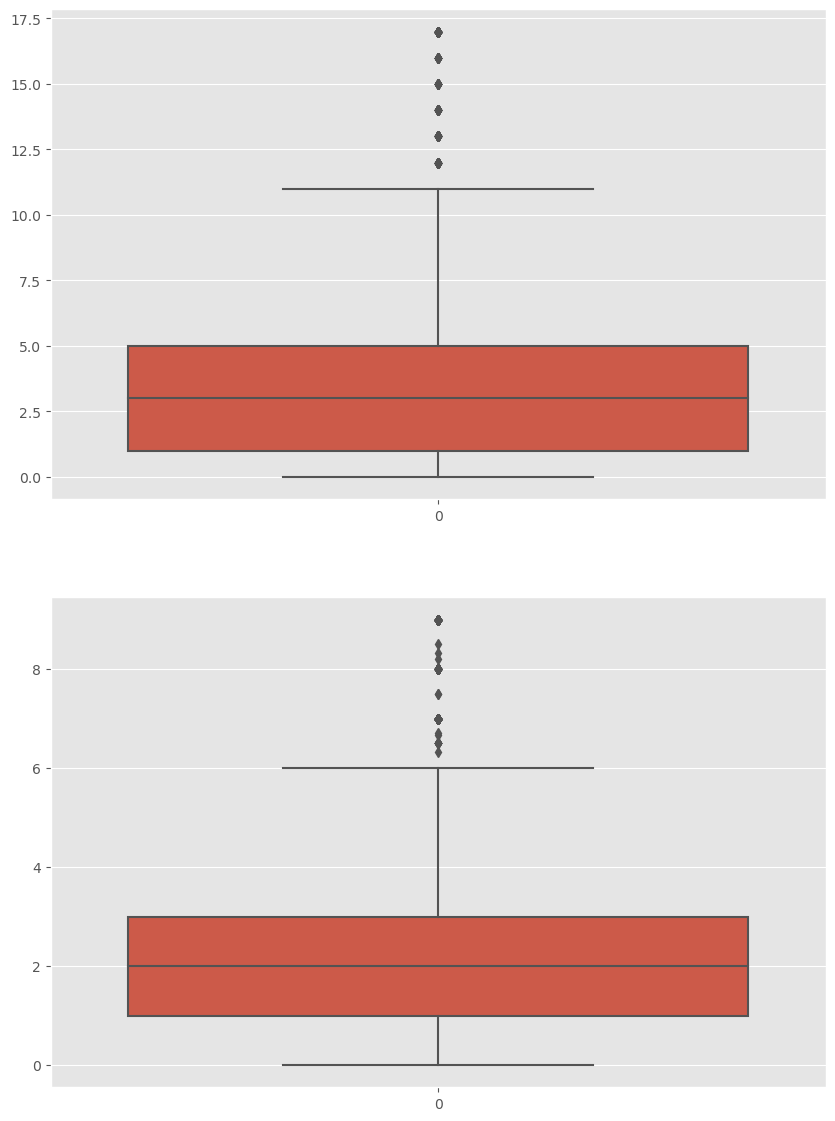

In [78]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(leads_data.total_visits)

plt.subplot(2,1,2)
sns.boxplot(leads_data.page_views_per_visit)
plt.show()

In [79]:
# As we can see, we were able to significantly reduce the number of outliers by capping

In [80]:
#Test-Train Split

# Let's put feature variable to X
X = leads_data.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,False,False,False,True,False,False,False,False,True,True,False,True,False


In [81]:
# Let's put response variable to y
y = leads_data['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [82]:
# Let's split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
# Feature Scaling 

scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,False,False,False,True,False,False,False,False,True,True,False,False,False
6795,0,0.21,0.01,-0.50,1,True,False,False,False,False,False,False,False,True,True,False,True,False
3516,0,0.51,-0.69,0.09,0,False,False,False,True,False,False,False,False,False,True,False,False,True
8105,0,0.51,1.37,1.36,0,True,False,True,False,False,False,False,True,False,True,False,False,False
3934,0,-1.02,-0.89,-1.18,0,False,False,False,True,False,False,False,False,True,True,False,False,False


In [84]:
# Let's check the conversion rate
conversion = (sum(leads_data['converted'])/len(leads_data['converted'].index))*100
conversion

38.53896103896104

In [85]:
# The conversion rate is 38.5%

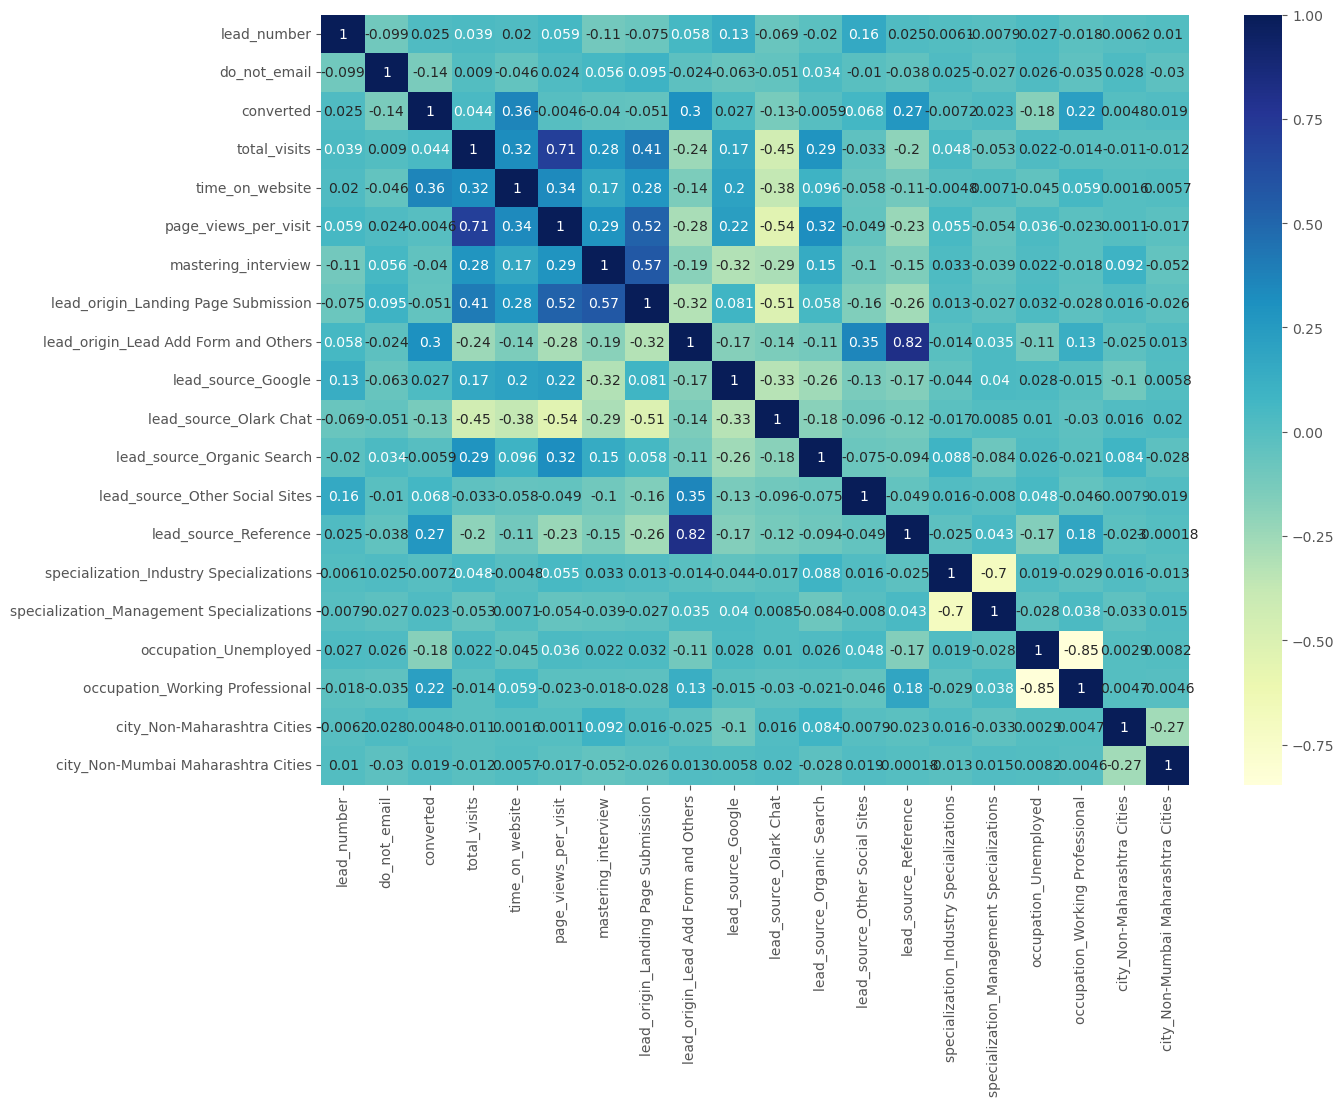

In [86]:
#Looking at correlations

# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(leads_data.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [87]:
#  Model Building
#  Model 1: All variables
    
y_train_np = y_train.values

X_train_int = X_train.astype(int)

# Let's Add a constant column to X_train_int
X_train_sm = sm.add_constant(X_train_int)

# Let's Fit the GLM model
logm1 = sm.GLM(y_train_np, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()

# Let's Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3422.1
Date:                Tue, 16 Apr 2024   Deviance:                       6844.2
Time:                        04:55:16   Pearson chi2:                 6.59e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2375
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [88]:
#Feature selection using RFE

# Let's initiate logistic regression
logreg = LogisticRegression()

# Let's initiate rfe
rfe = RFE(logreg, n_features_to_select=13)  # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', False, 5),
 ('lead_origin_Landing Page Submission', False, 3),
 ('lead_origin_Lead Add Form and Others', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Industry Specializations', True, 1),
 ('specialization_Management Specializations', False, 2),
 ('occupation_Unemployed', False, 6),
 ('occupation_Working Professional', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', False, 4)]

In [91]:
# Let's assign columns
col = X_train.columns[rfe.support_]

In [92]:
# Let's check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['mastering_interview', 'lead_origin_Landing Page Submission',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

In [93]:
#Model 2: Assessing the model with statsmodel

y_train_np = y_train.values

X_train_col = X_train.astype(int)

# Let's Add a constant column to X_train_int
X_train_sm = sm.add_constant(X_train_col)

# Let's Fit the GLM model
logm2 = sm.GLM(y_train_np, X_train_sm, family=sm.families.Binomial())
result = logm2.fit()

# Let's Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3422.1
Date:                Tue, 16 Apr 2024   Deviance:                       6844.2
Time:                        04:55:16   Pearson chi2:                 6.59e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2375
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------